<img src='../img/EU-Copernicus-EUM_3Logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='50%'></img>

<br>

<a href="../00_index.ipynb"><< Index</a><br>
<a href="./271_CEMS_GEFF_FWI_load_browse.ipynb"><< 271 - CEMS GEFF - Fire Weather Index - Load and browse</a><span style="float:right;"><a href="./273_CEMS_GEFF_FWI_custom_danger_classes.ipynb">273 - CEMS GEFF - Fire Weather Index - Custom Danger Classes>></a></span>

<div class="alert alert-block alert-success">
<b>20 - DATA EXPLORATION</b></div>

<div class="alert alert-block alert-success">
<b>PREREQUISITE</b>

**20 - DATA EXPLORATION**
 - [271 - CEMS GEFF - Fire Weather Index - Load and browse](./271_CEMS_GEFF_FWI_load_browse.ipynb)

It is recommended to go through the module before you start with this module.

</div>

<div class="alert alert-block alert-success">
<b>SEE ALSO</b>

**20 - DATA EXPLORATION**
 - [273 - CEMS GEFF - Fire Weather Index - Custom Danger Classes](./273_CEMS_GEFF_FWI_custom_danger_classes.ipynb) 

</div>

<hr>

# 2.7.2 CEMS Global ECMWF Fire Forecasting (GEFF) - Fire Weather Index - Harmonized Danger Classes

Raw FWI forecast values are expressed as a continuous rating in the range `[0, +Inf(very rarely above 100)]`. In order to support decision makers, raw forecasts are routinely converted into danger classes, based on the thresholds mentioned above, before being displayed by the EFFIS/GWIS viewer.

In this module, we are going to look at the predictive capability of the fire danger forecasts. Let us use the forecast issued on 14th July 2018 (leadtime = 10 days) to see whether dangerous fire weather could have been predicted in the area where the Attica fires started burning, from 23rd July onwards.

#### Module outline
* [1 - Overview of fire danger classes](#fire_danger_classes)
* [2 - Other Indicators](#other_indicators)

<hr>

#### Load required libraries

In [1]:
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt

#### Load helper functions

In [2]:
%run ../functions.ipynb

<hr>

## <a id='fire_danger_classes'></a>Overview of fire danger classes

According to EFFIS [documentation and user guidelines](https://effis.jrc.ec.europa.eu/about-effis/technical-background/fire-danger-forecast):

- In most European countries, the core of the wildfire season starts on 1st of March and ends on 31st of October.
- The EFFIS network adopts the Canadian Forest Fire Weather Index (FWI) System as the method to assess the fire danger level in a harmonized way throughout Europe.
  
**European** Fire Danger Classes (FWI ranges, upper bound excluded):
  - Very low = 0 - 5.2
  - Low = 5.2 - 11.2 
  - Moderate = 11.2 - 21.3 
  - High = 21.3 - 38.0 
  - Very high = 38.0 - 50.0 
  - Extreme > 50.0

Based on ECMWF's experience, the above thresholds are particularly suited to assess fire danger in southern Europe, e.g. in the Mediterranean region. Some countries tend to calibrate these thresholds depending on local vegetation characteristics and fire regimes. This require local knowledge and/or experimentation.
For instance, **Portugal** uses the following thresholds for local-level assessments of fire danger: 
  - Reduced risk = 8.4
  - Moderate risk = 17.2
  - High risk = 24.6,
  - Maximum risk = 38.3

Northern European countries might be more inclined to the **Canadian** threshold levels:
  - Very Low = 0 - 1,
  - Low = 2 - 4,
  - Moderate = 5 - 8,
  - High = 9 - 16,
  - VeryHigh = 17 - 30,
  - Extreme > 30
  
And as another example, in **Indonesia** threshold levels are (probably due to high level of humidity):
  - Very Low = 0 - 3,
  - Low = 3 - 5,
  - Moderate = 5 - 10,
  - High = 10 - 17,
  - VeryHigh = 17 - 28,
  - Extreme > 28

#### Open the `raw RT HRES`  forecast for Attica (Greece), issued on 14th July 2018 (10 days before the Attica fires) and plot the raw forecast

In [3]:
ds = xr.open_dataset("../eodata/geff/greece/rt_hr/ECMWF_FWI_20180714_1200_hr_fwi_rt.nc")
da_fwi = ds.fwi
da_fwi

<xarray.DataArray 'fwi' (time: 10, lat: 29, lon: 28)>
array([[[20.050251, 23.000818, ...,       nan,       nan],
        [32.132492, 25.631977, ...,       nan,       nan],
        ...,
        [19.706554, 13.005656, ...,       nan, 26.834423],
        [17.043745, 19.07169 , ..., 40.600723, 41.358883]],

       [[22.435228, 24.372599, ...,       nan,       nan],
        [34.900818, 32.095364, ...,       nan,       nan],
        ...,
        [20.280851, 13.825513, ...,       nan, 26.938839],
        [17.678843, 19.491795, ..., 40.453545, 40.578785]],

       ...,

       [[34.2583  , 40.922886, ...,       nan,       nan],
        [46.096195, 44.52451 , ...,       nan,       nan],
        ...,
        [25.471806, 19.874577, ...,       nan, 15.245529],
        [22.26363 , 20.797256, ..., 21.847431, 23.752083]],

       [[32.04552 , 36.09763 , ...,       nan,       nan],
        [42.74619 , 38.150772, ...,       nan,       nan],
        ...,
        [27.505   , 20.018301, ...,       nan, 12.397572],
        [28.416103, 25.35445 , ..., 18.833403, 20.855295]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2018-07-14 2018-07-15 ... 2018-07-23
  * lon      (lon) float32 23.06 23.13 23.2 23.27 ... 24.75 24.82 24.89 24.96
  * lat      (lat) float32 38.98 38.91 38.84 38.77 ... 37.22 37.15 37.08 37.01
Attributes:
    units:    -
    title:    Fire Weather Index

Let us visualize the Fire Weather Index forecast for 23 July 2018 with the function [visualize_pcolormesh()](../functions.ipynb#visualize_pcolormesh). The forecast for the 23 July 2018 is index nine of the loaded dataset.

In [4]:
visualize_pcolormesh(data_array=da_fwi[9,:,:],
                     longitude= da_fwi.lon,
                     latitude=da_fwi.lat,
                     projection=ccrs.PlateCarree(),
                     color_scale='viridis',
                     long_name=da_fwi.title,
                     unit=da_fwi.units,
                     vmin=0,
                     vmax=70,
                     set_global=False,
                     latmin=da_fwi.lat.min(),
                     latmax=da_fwi.lat.max(),
                     lonmin=da_fwi.lon.min(),
                     lonmax=da_fwi.lon.max())

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Fire Weather Index'}>)


#### Reclassify the `Fire Weather Index` levels according to the European Fire Danger classes


To matplotlib's function `plot()`, you can provide additional keyword arguments that help you to classify the data values:
* `levels`: provide the maximum bounds for each level in a list
* `colors`: provide the hexcolor codes for each class
* `label`: provide the class label

Let us visualize the forecast for 23 July 2018 again, but reclassify the Fire Weather Index levels according to the European Fire Danger classes.

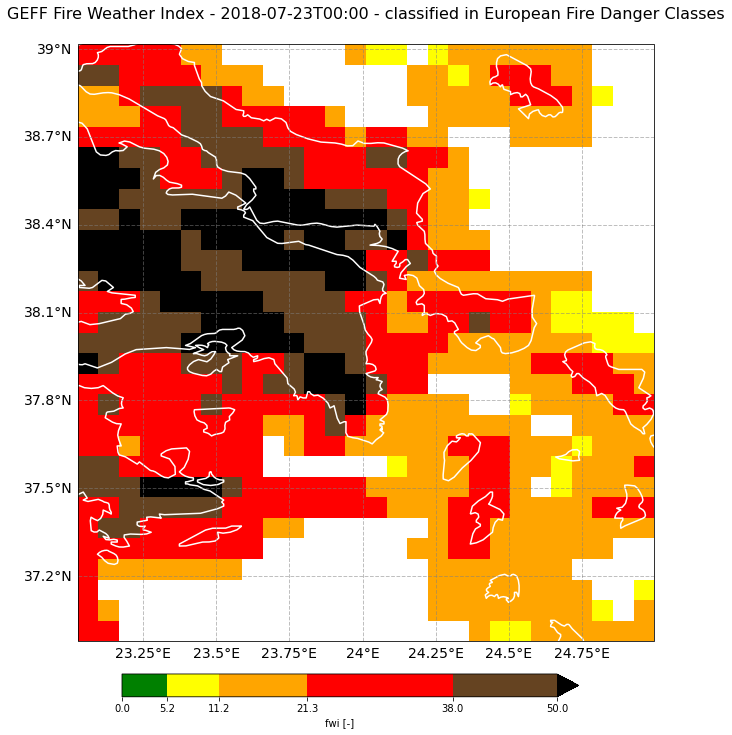

In [5]:
# Initiate a matplotlib figure
fig=plt.figure(figsize=(20,12))
ax=plt.subplot(1,1,1, projection=ccrs.PlateCarree())

# Specify coastlines and borders
ax.coastlines(color='white',linewidth=1.5)
ax.add_feature(cfeature.BORDERS, edgecolor='white', linewidth=1, zorder=3)

# Specify a grid
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels=False
gl.right_labels=False
gl.xformatter=LONGITUDE_FORMATTER
gl.yformatter=LATITUDE_FORMATTER
gl.xlabel_style={'size':14}
gl.ylabel_style={'size':14}

# Plotting function
da_fwi[9,:,:].plot(levels = [0.0, 5.2, 11.2, 21.3, 38.0, 50.0],
               colors = ["#008000", "#FFFF00", "#FFA500", "#FF0000", "#654321", "#000000"],
               label = ['Very low', 'Low', 'Moderate', 'High', 'Very high', 'Extreme'],
                  ax=ax,
               cbar_kwargs={'spacing':'proportional',
                           'ticks':[0.0, 5.2, 11.2, 21.3, 38.0, 50.0],
                            'fraction':0.035,
                            'pad':0.05,
                           'orientation':'horizontal'})

# Set plot title
ax.set_title('GEFF Fire Weather Index - ' + str(da_fwi[9,:,:].time.data)[0:16] + ' - classified in European Fire Danger Classes\n', size=16)

# Show the plot
plt.show()

#### Highlight only cells above `Very High` danger

With xarray's function `where`, you can filter your data based on a specific condition. Use the function to only highlight areas with a `very high` fire danger (> 38.0 degree Celsius). The function below reassigns all FWI values below 38.0 to 0 and keeps only the grid points higher than a FWI of 38.

In [6]:
da_fwi_vh = xr.where(cond = da_fwi < 38.0, x = 0, y = da_fwi)
da_fwi_vh

<xarray.DataArray 'fwi' (time: 10, lat: 29, lon: 28)>
array([[[ 0.      ,  0.      ,  0.      , ...,       nan,       nan,
               nan],
        [ 0.      ,  0.      ,  0.      , ...,       nan,       nan,
               nan],
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,       nan,
               nan],
        ...,
        [ 0.      ,       nan,       nan, ...,       nan,       nan,
          0.      ],
        [ 0.      ,  0.      ,       nan, ...,  0.      ,       nan,
          0.      ],
        [ 0.      ,  0.      ,       nan, ..., 40.397392, 40.600723,
         41.358883]],

       [[ 0.      ,  0.      ,  0.      , ...,       nan,       nan,
               nan],
        [ 0.      ,  0.      ,  0.      , ...,       nan,       nan,
               nan],
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,       nan,
               nan],
...
        [ 0.      ,       nan,       nan, ...,       nan,       nan,
          0.      ],
        [ 0.      ,  0.      ,       nan, ...,  0.      ,       nan,
          0.      ],
        [ 0.      ,  0.      ,       nan, ...,  0.      ,  0.      ,
          0.      ]],

       [[ 0.      ,  0.      ,  0.      , ...,       nan,       nan,
               nan],
        [42.74619 , 38.150772,  0.      , ...,       nan,       nan,
               nan],
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,       nan,
               nan],
        ...,
        [ 0.      ,       nan,       nan, ...,       nan,       nan,
          0.      ],
        [ 0.      ,  0.      ,       nan, ...,  0.      ,       nan,
          0.      ],
        [ 0.      ,  0.      ,       nan, ...,  0.      ,  0.      ,
          0.      ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2018-07-14 2018-07-15 ... 2018-07-23
  * lon      (lon) float32 23.06 23.13 23.2 23.27 ... 24.75 24.82 24.89 24.96
  * lat      (lat) float32 38.98 38.91 38.84 38.77 ... 37.22 37.15 37.08 37.01

Now, let's again visualize the Fire Weather Index data, but only with two classes: (i) cells of `very high danger` and (ii) cells below.

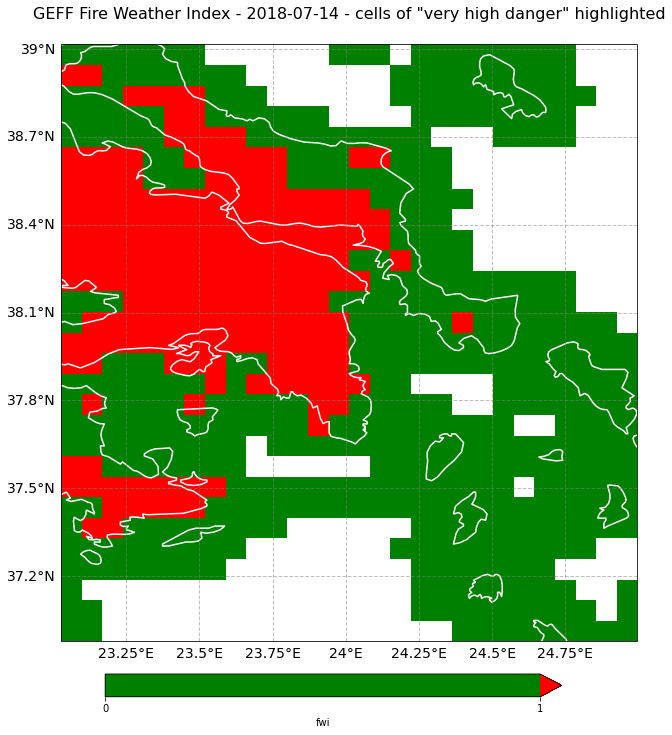

In [7]:
# Initiate a matplotlib figure
fig=plt.figure(figsize=(20,12))
ax=plt.subplot(1,1,1, projection=ccrs.PlateCarree())

# Specify coastlines and borders
ax.coastlines(color='white',linewidth=1.5)
ax.add_feature(cfeature.BORDERS, edgecolor='white', linewidth=1, zorder=3)

# Specify a grid
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels=False
gl.right_labels=False
gl.xformatter=LONGITUDE_FORMATTER
gl.yformatter=LATITUDE_FORMATTER
gl.xlabel_style={'size':14}
gl.ylabel_style={'size':14}

# Plotting function
da_fwi_vh[9,:,:].plot(levels = [0.0, 1],
               colors = ["#008000", "#FF0000"],
               label = ['Below', 'Very high danger'],
                  ax=ax,
               cbar_kwargs={'spacing':'proportional',
                           'ticks':[0.0, 1],
                            'fraction':0.035,
                            'pad':0.05,
                           'orientation':'horizontal'})

# Set plot title
ax.set_title('GEFF Fire Weather Index - ' + str(da_fwi_vh.time.data)[2:12] + ' - cells of "very high danger" highlighted\n', size=16)

# Show the plot
plt.show()

## <a id='other_indicators'></a>Other danger indicators

Given the different climatic conditions in Europe, EFFIS also publishes two indicators that provide information on the local/temporal variability of the FWI compared to a historical series of approximately 30 years. These indicators are: 
* (a) the `ranking`, which provides percentiles of occurrence of the values, and 
* (b) the `anomaly`, computed as a standard deviation from the historical mean values. 


<br>

<a href="../00_index.ipynb"><< Index</a><br>
<a href="./271_CEMS_GEFF_FWI_load_browse.ipynb"><< 271 - CEMS GEFF - Fire Weather Index - Load and browse</a><span style="float:right;"><a href="./273_CEMS_GEFF_FWI_custom_danger_classes.ipynb">273 - CEMS GEFF - Fire Weather Index - Custom Danger Classes>></a></span>

<hr>

<p><img src='../img/copernicus_logo.png' align='left' alt='Logo EU Copernicus' width='25%'></img></p>
<br clear=left>
<p style="text-align:left;">This project is licensed under the <a href="../LICENSE">MIT License</a> <span style="float:right;"><a href="https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a>